# Finding exponents for specific heat and susceptibility


date : 2019.07.07

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from multiprocessing import Pool  # for parallel computation
from itertools import repeat  # repeating in iteration
import seaborn as sns

### Font

In [2]:
font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

font_16 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

font_12 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

inside_font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 6,
        }



## defined fundtions

In [3]:
length_to_plot_for = [200, 250, 300, 350, 400]
# length_to_plot_for = [100, 150, 200, 250, 300, 350, 400]

In [4]:
def plot_one(pc, one_by_nu, alpha_by_nu):
    for L in data.keys():
        if L not in length_to_plot_for:
            continue
            pass
        p, C, C_conv, X, X_conv = data[L].T
        x = (p-pc)*L**(one_by_nu)
        y = C_conv*L**(-alpha_by_nu)
        plt.plot(x, y, label='L={}'.format(L), linewidth=1)
        pass

    plt.legend()

In [5]:
def plot_for(pc, one_by_nu, alpha_by_nu):

    f = plt.figure(figsize=(10, 7), dpi=100)

#     f.add_subplot(2, 2, 1)
#     plot_one(pc, one_by_nu, alpha_by_nu)
#     plt.xlim(-10, 10)
#     plt.legend()
#     plt.text(0, 1.0, 'pc={},1/nu={},alpha/nu={}'.format(pc, one_by_nu, alpha_by_nu), fontdict=font)

#     f.add_subplot(2, 2, 2)
#     plot_one(pc, one_by_nu, alpha_by_nu)
#     plt.xlim(-7, -3)
#     plt.ylim(0, 1)
#     plt.legend()


#     f.add_subplot(2, 2, 3)
    plot_one(pc, one_by_nu, alpha_by_nu)
    plt.xlim(-.9, .4)
    plt.ylim(1.6, 2.6)
    plt.legend()
    


#     f.add_subplot(2, 2, 4)
#     plot_one(pc, one_by_nu, alpha_by_nu)
#     plt.xlim(3, 7)
#     plt.ylim(0, 1)
#     plt.legend()
    
    f.text(0.5, 0.5, 'pc={},1/nu={},alpha/nu={}'.format(pc, one_by_nu, alpha_by_nu), fontdict=font)
    
    out_file_name = out_img_dir + '/tuning/' + signature
    out_file_name += '-specific_heat-pc{:.4f}_alpha_{:.3f}_nu_{:.3f}.png'.format(pc, alpha_by_nu, one_by_nu)
    
    print(out_file_name)
    plt.savefig(out_file_name)

### directories

In [21]:
out_img_dir = "./graphs/"
out_data_dir = "./results/"
# in_data_dir = "./data/periodic/"
in_data_dir = "./data_2019.04.26/calculated-convolved/"
signature = "sq_lattice_site_percolation_periodic__L*_1times_calculated-convolved*"

# in_data_dir = "./data-rsbd-2019.06/average/convoluted/"
# signature = "sq_lattice_site_percolation_ballistic_deposition_L{}_periodic__L*-avg.txt_convoluted.txt".format(2)

# in_data_dir = "./data-2019.07.08/convoluted/"
# signature = "sq_lattice_site_percolation_periodic__L*convoluted.txt"

calculated_data_dir = "./calculated_data/"

#### signatures

In [22]:
all_signatures = ['sq_lattice_site_percolation_non_periodic_',
                  'sq_lattice_site_percolation_periodic_',

                  'sq_lattice_site_percolation_ballistic_deposition_L1_non_periodic_',
                  'sq_lattice_site_percolation_ballistic_deposition_L1_periodic_',

                  'sq_lattice_site_percolation_ballistic_deposition_L2_non_periodic_',
                  'sq_lattice_site_percolation_ballistic_deposition_L2_periodic_']

In [23]:
convolution_flags = ['*calculated-.txt_convolved.txt',
                     '*calculated-.txt_convolved.txt_convolved.txt',
                     '*calculated-.txt_convolved.txt_convolved.txt_convolved.txt']

In [24]:

files = glob.glob(in_data_dir + signature)
# print("chosen signature")
print(signature)

sq_lattice_site_percolation_periodic__L*_1times_calculated-convolved*


In [25]:
files

['./data_2019.04.26/calculated-convolved/sq_lattice_site_percolation_periodic__L350_1times_calculated-convolved.csv',
 './data_2019.04.26/calculated-convolved/sq_lattice_site_percolation_periodic__L100_1times_calculated-convolved.csv',
 './data_2019.04.26/calculated-convolved/sq_lattice_site_percolation_periodic__L300_1times_calculated-convolved.csv',
 './data_2019.04.26/calculated-convolved/sq_lattice_site_percolation_periodic__L400_1times_calculated-convolved.csv',
 './data_2019.04.26/calculated-convolved/sq_lattice_site_percolation_periodic__L200_1times_calculated-convolved.csv',
 './data_2019.04.26/calculated-convolved/sq_lattice_site_percolation_periodic__L250_1times_calculated-convolved.csv',
 './data_2019.04.26/calculated-convolved/sq_lattice_site_percolation_periodic__L150_1times_calculated-convolved.csv']

### Entropy data

In [11]:
def load_entropy_data(files):
    data = dict()
    ensembles = dict()
    for file in files:
        f = open(file)
        l = f.readline()
    #     print(l)
        if l[0]=='#':
            l=l[1:]
        header = json.loads(l)
        print(header)
        L = int(header['length'])
        ensmbl = int(header['ensemble_size'])
        if L in ensembles:
            ensembles[L] += ensmbl
        else:
            ensembles[L] = ensmbl

        H = np.loadtxt(file, usecols=(1,), skiprows=1, unpack=True)

        if L in data:
            data[L] += ensmbl*H
        else:
            data[L] = ensmbl*H
        pass

    #### taking average
    for L in ensembles.keys():
        data[L] = data[L]/ensembles[L]
        pass
    print(ensembles)
    return data

In [12]:
def load_order_parameter_data(files, use="spanning_cluster"):
    """
    use : spanning_cluster is column 3 and largest_cluster is column 2
    """
    c = 3
    if use=="largest_cluster":
        c = 2
        pass
    
    data = dict()
    ensembles = dict()
    for file in files:
        f = open(file)
        l = f.readline()
    #     print(l)
        if l[0]=='#':
            l=l[1:]
        header = json.loads(l)
        print(header)
        L = int(header['length'])
        ensmbl = int(header['ensemble_size'])
        if L in ensembles:
            ensembles[L] += ensmbl
        else:
            ensembles[L] = ensmbl
        
        P = np.loadtxt(file, usecols=(c,), skiprows=1, unpack=True)

        if L in data:
            data[L] += ensmbl*P
        else:
            data[L] = ensmbl*P
        pass

    #### taking average
    for L in ensembles.keys():
        data[L] = data[L]/ensembles[L]
        pass
    print(ensembles)
    return data

### Defined for site percolation only

in site percolation $dp=\frac{1}{L^2}$

in bond percolation $dp=\frac{1}{2 L^2}$

In [13]:
def get_specific_heat(L, H):
    """
    L : length
    H : entropy
    
    definitions : 
    C = (1-p) * dH / d(1-p)
    dp = 1/L**2
    C = -(1-p) * dH * L**2
    """
    p = np.linspace(1/L**2, 1, L**2)
    T = 1-p
    C = -T[1:] * np.diff(H) * L**2
    return p[1:], C
    

In [14]:
def get_susceptibility(L, P):
    """
    L : length
    P : order parameter
    
    definitions : 
    X = dP/dp
    dp = 1/L**2
    X = dP * L**2
    """
    p = np.linspace(1/L**2, 1, L**2)
    X = np.diff(P) * L**2
    return p[1:], X

## Entropy and it's derivative

In [57]:
entropy_data = load_entropy_data(files)
# order_parameter_data = load_order_parameter_data(files)

{'length': 400, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 100, 'ensemble_size': 15000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 500, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 300, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 200, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{400: 10000, 10

In [ ]:
alpha_by_nu = 0.5
one_by_nu = 0.5

(0.5, 0.7)

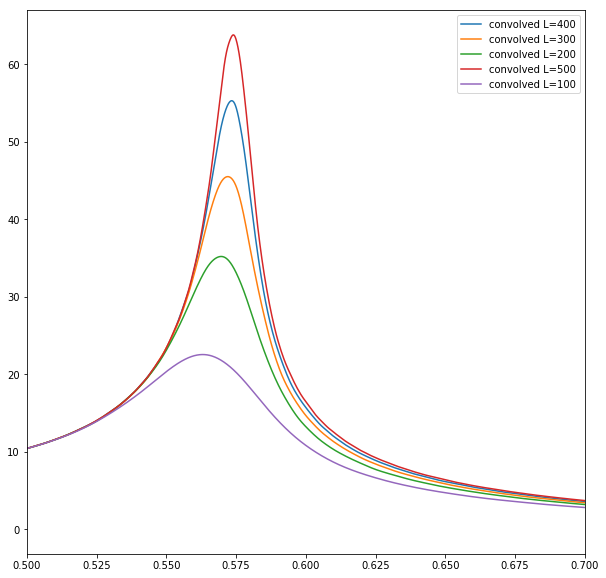

In [31]:
fig = plt.figure(figsize=(10, 10))
for L in entropy_data.keys():
    H= entropy_data[L]
    p = np.linspace(1/L**2, 1, L**2)
    x = p
    x, y = get_specific_heat(L, H)
#     plt.plot(x, C, label='original L={}'.format(L))
    plt.plot(x, y, label='convolved L={}'.format(L))
#     plt.plot(x, y, label='L={}'.format(L))
    pass
    
plt.legend()
plt.xlim(0.5, 0.7)

In [42]:
### Approximately

pc = 0.5782
one_by_nu = 0.736 # 0.736, 0.739

## 1st convolution
alpha_by_nu = 0.6631 # fine tuning
beta_by_nu = 0.0982 # fine tuning
gamma_by_nu = 0.6362

### Data collapse


In [58]:
C_h_data = []
# fig = plt.figure(figsize=(10, 10))
for L in entropy_data.keys():
    H= entropy_data[L]
    p = np.linspace(1/L**2, 1, L**2)
    
    p, C = get_specific_heat(L, H)
    C_h_data.append([L, np.max(C)])
#     x = (p-pc)*L**(one_by_nu)
#     y = C*L**(-alpha_by_nu)
    
#     plt.plot(x, C, label='original L={}'.format(L))
#     plt.plot(x, y, label='convolved L={}'.format(L))
#     plt.plot(x, y, label='L={}'.format(L))
    pass

# plt.legend()
# plt.xlim(-10, 10)

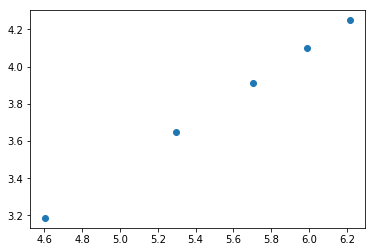

In [59]:
C_h_data_log = np.log(C_h_data)
plt.plot(C_h_data_log[:,0], C_h_data_log[:,1], 'o')

In [61]:
stats.linregress(C_h_data_log[:,0], C_h_data_log[:,1])

LinregressResult(slope=0.6587952371682433, intercept=0.1546361682930062, rvalue=0.9999801482603824, pvalue=1.0617699246283913e-07, stderr=0.0023966828737656933)

## Finding exponent from log-log graph

### finding $\alpha/\nu$

[[200, 92.3949], [250, 107.34], [300, 121.454], [350, 134.468], [400, 148.023]]
\log(L)	\log(C_h)
[[5.29831737 4.52607178]
 [5.52146092 4.67600137]
 [5.70378247 4.79953559]
 [5.85793315 4.90132625]
 [5.99146455 4.99736767]]


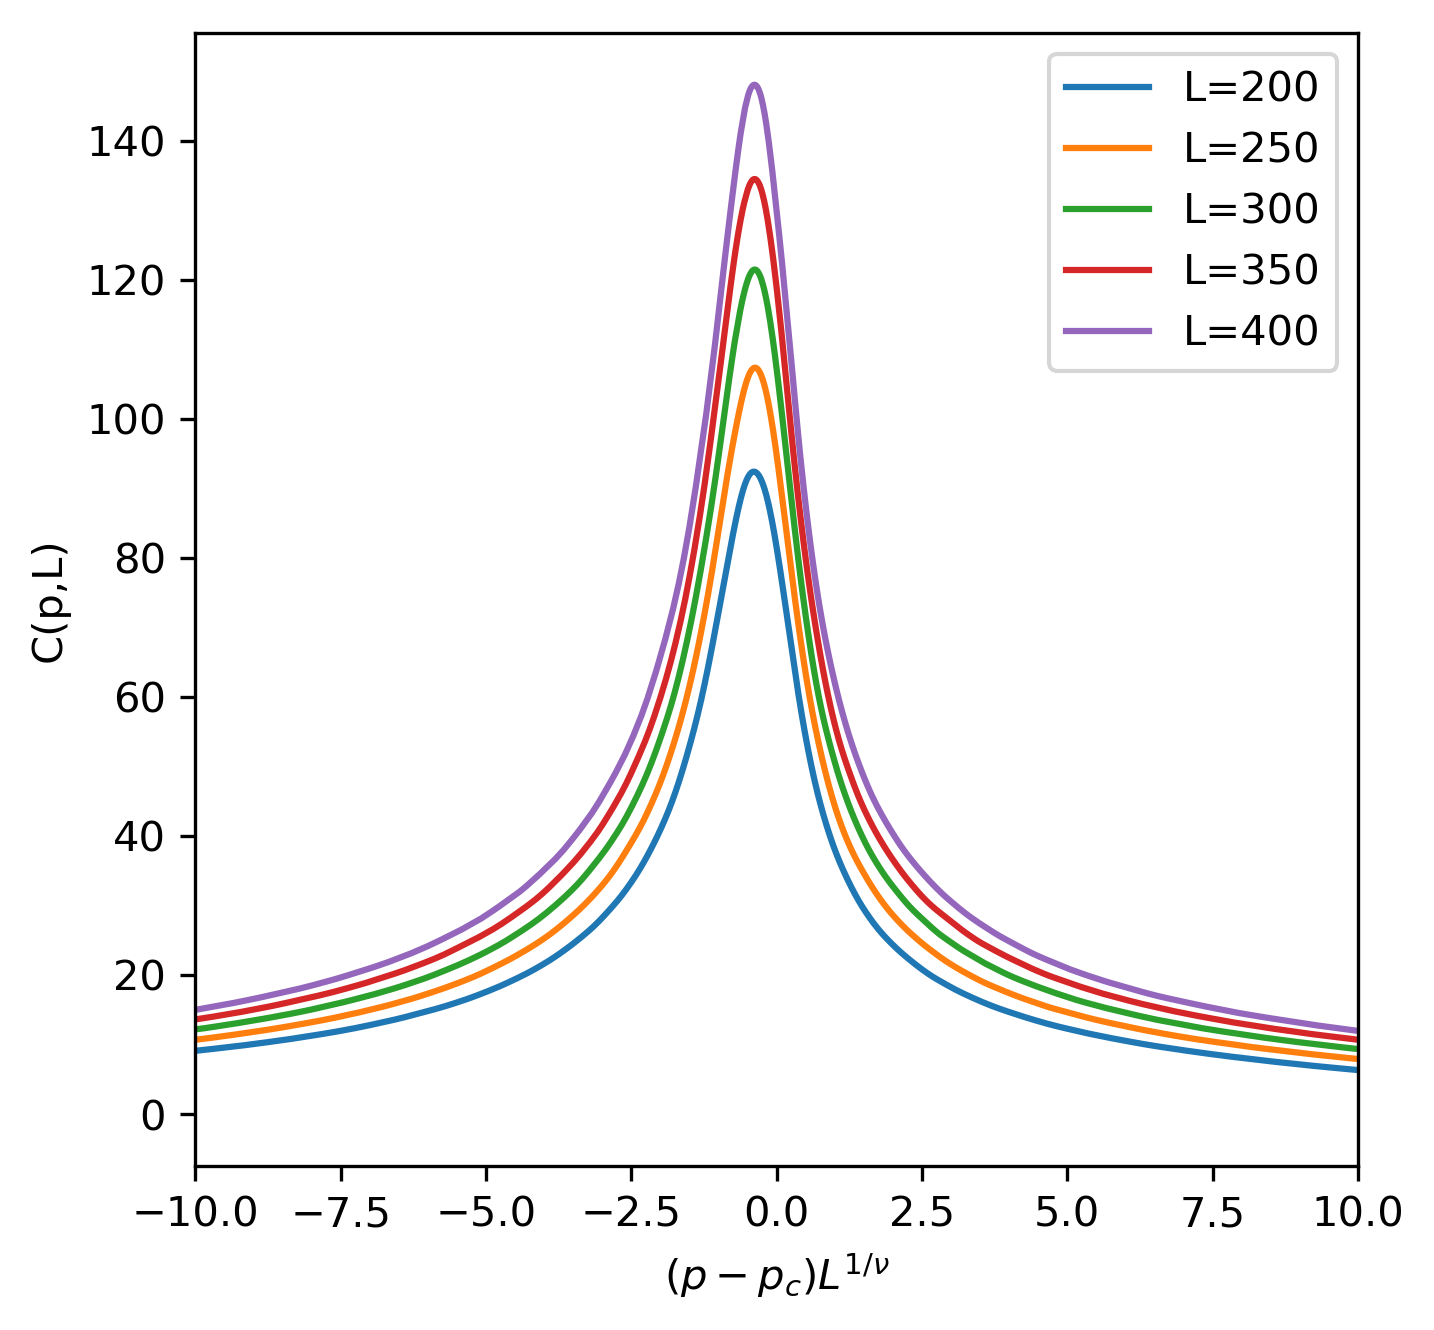

In [35]:
plt.figure(figsize=(5,5), dpi=300)
Ch = []
lengths = np.sort(list(data.keys()))
for L in lengths:
    p, C, C_conv, X, X_conv = data[L].T
    
    x = (p-pc)*L**(one_by_nu)
    y = C_conv
    Ch.append([L, np.max(y)])
    plt.plot(x, y, label='L={}'.format(L))
    pass
plt.legend()
plt.xlim(-10, 10)

print(Ch)
ch_log = np.log(Ch)
print("\log(L)\t\log(C_h)")
print(ch_log)

plt.xlabel(r'$(p-p_c)L^{1/\nu}$')
plt.ylabel(r'C(p,L)')

out_file_name = out_img_dir + signature
out_file_name += '_specific_heat-x-scaled-pc{:.4f}_alpha_{:.4f}_nu_{:.3f}.eps'.format(pc, alpha_by_nu, one_by_nu)
# print(out_file_name)
# plt.savefig(out_file_name)

In [34]:
regress = stats.linregress(ch_log[:,0], ch_log[:,1])
regress

LinregressResult(slope=0.6774268062252266, intercept=0.9359400051576183, rvalue=0.9999395105890055, pvalue=5.647405212263732e-07, stderr=0.004302056696517039)

Text(0,0.5,'$log(C_h)$')

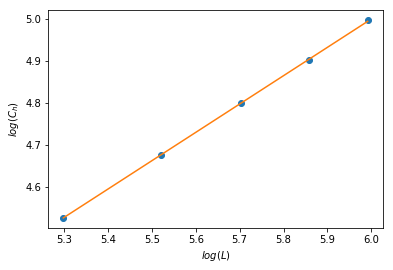

In [35]:
plt.plot(ch_log[:,0], ch_log[:,1], 'o')


x = np.linspace(np.min(ch_log[:,0]), np.max(ch_log[:,0]), 10)
y = regress[0]*x + regress[1]
plt.plot(x, y)

plt.xlabel(r'$log(L)$')
plt.ylabel(r'$log(C_h)$')

### defined exponents and constants

In [36]:
pc = 0.5702
one_by_nu = 0.65 # 0.69 to 0.71

## 1st convolution
alpha_by_nu = 0.664 # fine tuning

In [20]:
# plot_for(pc, one_by_nu, 0.64)
# plot_for(pc, one_by_nu, 0.645)
# plot_for(pc, one_by_nu, 0.65)
# plot_for(pc, one_by_nu, 0.655)

# plot_for(pc, one_by_nu, 0.66)
# plot_for(pc, one_by_nu, 0.665)
# plot_for(pc, one_by_nu, 0.67)


# plot_for(pc, one_by_nu, 0.658)
# plot_for(pc, one_by_nu, 0.662)
# plot_for(pc, one_by_nu, 0.664)
# plot_for(pc, one_by_nu, 0.666)
# plot_for(pc, one_by_nu, 0.668)
# plot_for(pc, one_by_nu, 0.67)

### Find exponent statistically

#### Finds exponent based on the heighest peak

In [21]:
def find_height_difference(pc, one_by_nu, alpha_by_nu):
    heights = []
    lengths = np.sort(list(data.keys()))
    for L in lengths:
        p, C, C_conv, X, X_conv = data[L].T

        x = (p-pc)*L**(one_by_nu)
        y = C_conv*L**(-alpha_by_nu)
        heights.append(np.max(y))  # save maximum heights
        pass

    diff = np.max(heights) - np.min(heights)  # difference
#     diff = np.std(heights)  # standard deviation
    return diff


def find_exponent_with_minimum_deviation(pc, one_by_nu, start, stop, step):
    exponents = np.arange(start, stop, step)
    deviations = []
    for ex in exponents:
        a = find_height_difference(pc, one_by_nu, ex)
        deviations.append(a)

        pass
    # print(deviations)
    min_dev = np.min(deviations)
    df = pd.DataFrame(np.array([exponents, deviations]).T)


    exponent = df[df[1]==min_dev]
    print(exponent)
    print("minimum deviation ", min_dev)
    print("pc ", pc)
    print("1/nu ", one_by_nu)

In [22]:
pc = 0.5701  # more accurate
one_by_nu = 0.72108108 # effect of new

find_exponent_with_minimum_deviation(pc, one_by_nu, 0.6, 0.68, 1e-4)

          0         1
799  0.6799  0.013197
minimum deviation  0.013197465363807392
pc  0.5701
1/nu  0.72108108


In [23]:
# 1/nu = 0.7 => alpha/nu = 0.6631


# Find optimum 1/nu

In [24]:
def find_x_deviation(args):
    """
        date: 2018.11.07
        h : height
        a : 0 -> low value
            1 -> high value
        return : left standard deviation, right standard deviation
    """
    if len(args) < 4:
        print("3 argument is needed")
        return -1
    h, one_by_nu, alpha_by_nu, plot_flag = args

    intersection_x = [] # [L, x_left, x_right] x values at intersections
#     fig = plt.figure(figsize=(5,5), dpi=300)
    for N in data.keys():
        p, C, C_conv, X, X_conv = data[N].T
        y = C_conv*N**(-alpha_by_nu)
        y_h = np.ones(p.shape[0])*h
        x = (p-pc)*N**(one_by_nu)
        idx = np.argwhere(np.diff(np.sign(y_h - y))).flatten()
        if plot_flag:
            plt.plot(x, y, label='N={}'.format(N))
            plt.plot(x, y_h)
            plt.plot(x[idx], y_h[idx], 'o')
            pass
        
        intersection_x.append([N, x[idx][0], x[idx][1]])
        pass

    if plot_flag:
        plt.legend()
        plt.xlim(-5,5)
        plt.locator_params(nbins=5, axis='x')
        plt.xlabel(r'$(t-t_c) N ^{1/\nu}$')
        plt.ylabel(r'$\chi N^{-\gamma/\nu}$')
        pass
    intersection_x = np.array(intersection_x)
    intersection_x[:,1] /= np.max(intersection_x[:,1])  # to normalize things
    intersection_x[:,2] /= np.max(intersection_x[:,2])  # to normalize things
    return [np.std(intersection_x[:,1]), np.std(intersection_x[:,2])]

In [27]:
# one by nu is ex
ex = 0.74
eps = 0.06
one_by_nu_range = np.linspace(ex - eps, ex+eps, 1000)

[0.22677291602181923, 0.08019099878770554]

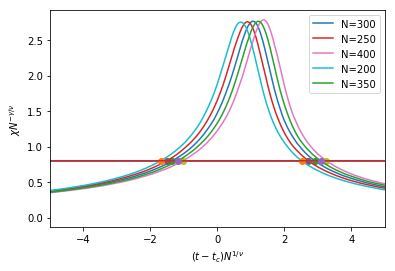

In [28]:
h = 0.8
find_x_deviation((h, one_by_nu, alpha_by_nu, True))

In [29]:
h = 0.8
p = Pool(4)
returned  = p.map(find_x_deviation, [(h, ex, alpha_by_nu, False) for ex in one_by_nu_range])

In [30]:
returned = np.array(returned)
left = returned[:,0]
right = returned[:,1]

# plotting

IndexError: index 0 is out of bounds for axis 0 with size 0

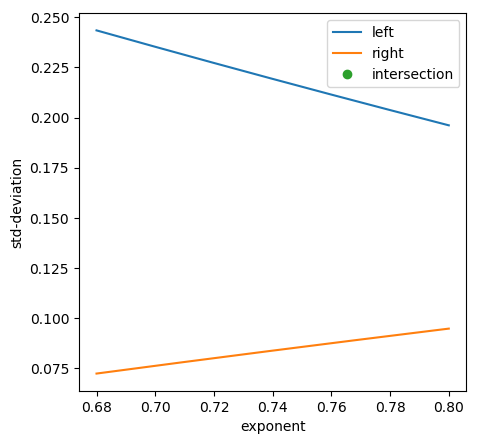

In [31]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.plot(one_by_nu_range, left, label='left')
plt.plot(one_by_nu_range, right, label='right')
idx = np.argwhere(np.diff(np.sign(left - right))).flatten()
plt.plot(one_by_nu_range[idx], left[idx], 'o', label='intersection')
plt.xlabel('exponent')
plt.ylabel('std-deviation')
plt.legend()

fig.text(0.3, 0.5, 'intersection exponent = {:.5f}'.format(one_by_nu_range[idx][0]))
plt.tight_layout(pad=0.7)
# filename = graph_location + "M{}/".format(M) + 'network_ba_explosive_M{}_specific_heat_minimizing_one_by_nu'.format(M)
# plt.savefig(filename)

## printing exponents

In [29]:
l = np.argmin(left)
print(one_by_nu_range[l], ', ', left[l],', ', right[l])
r = np.argmin(right)
print(one_by_nu_range[r], ', ', left[r],', ', right[r])

print('middle 1/nu = ', one_by_nu_range[idx][0])
print("left 1/nu = ", one_by_nu_range[l])
print("right 1/nu = ", one_by_nu_range[r])

0.7571171171171172 ,  0.0013839451409526702 ,  0.004088987821846821
0.7407807807807808 ,  0.004264027270153372 ,  0.0008984603709643314
middle 1/nu =  0.7494294294294295
left 1/nu =  0.7571171171171172
right 1/nu =  0.7407807807807808


# No further Estimation

### estimated exponent

In [13]:

pc = 0.5782
one_by_nu = 0.736 # 0.736, 0.739


## 1st convolution
alpha_by_nu = 0.6712
beta_by_nu = 0.1026
gamma_by_nu = 0.6287

### output graphs

./graphs/sq_lattice_site_percolation_ballistic_deposition_L2_periodic__specific_heat-pc0.5701.eps


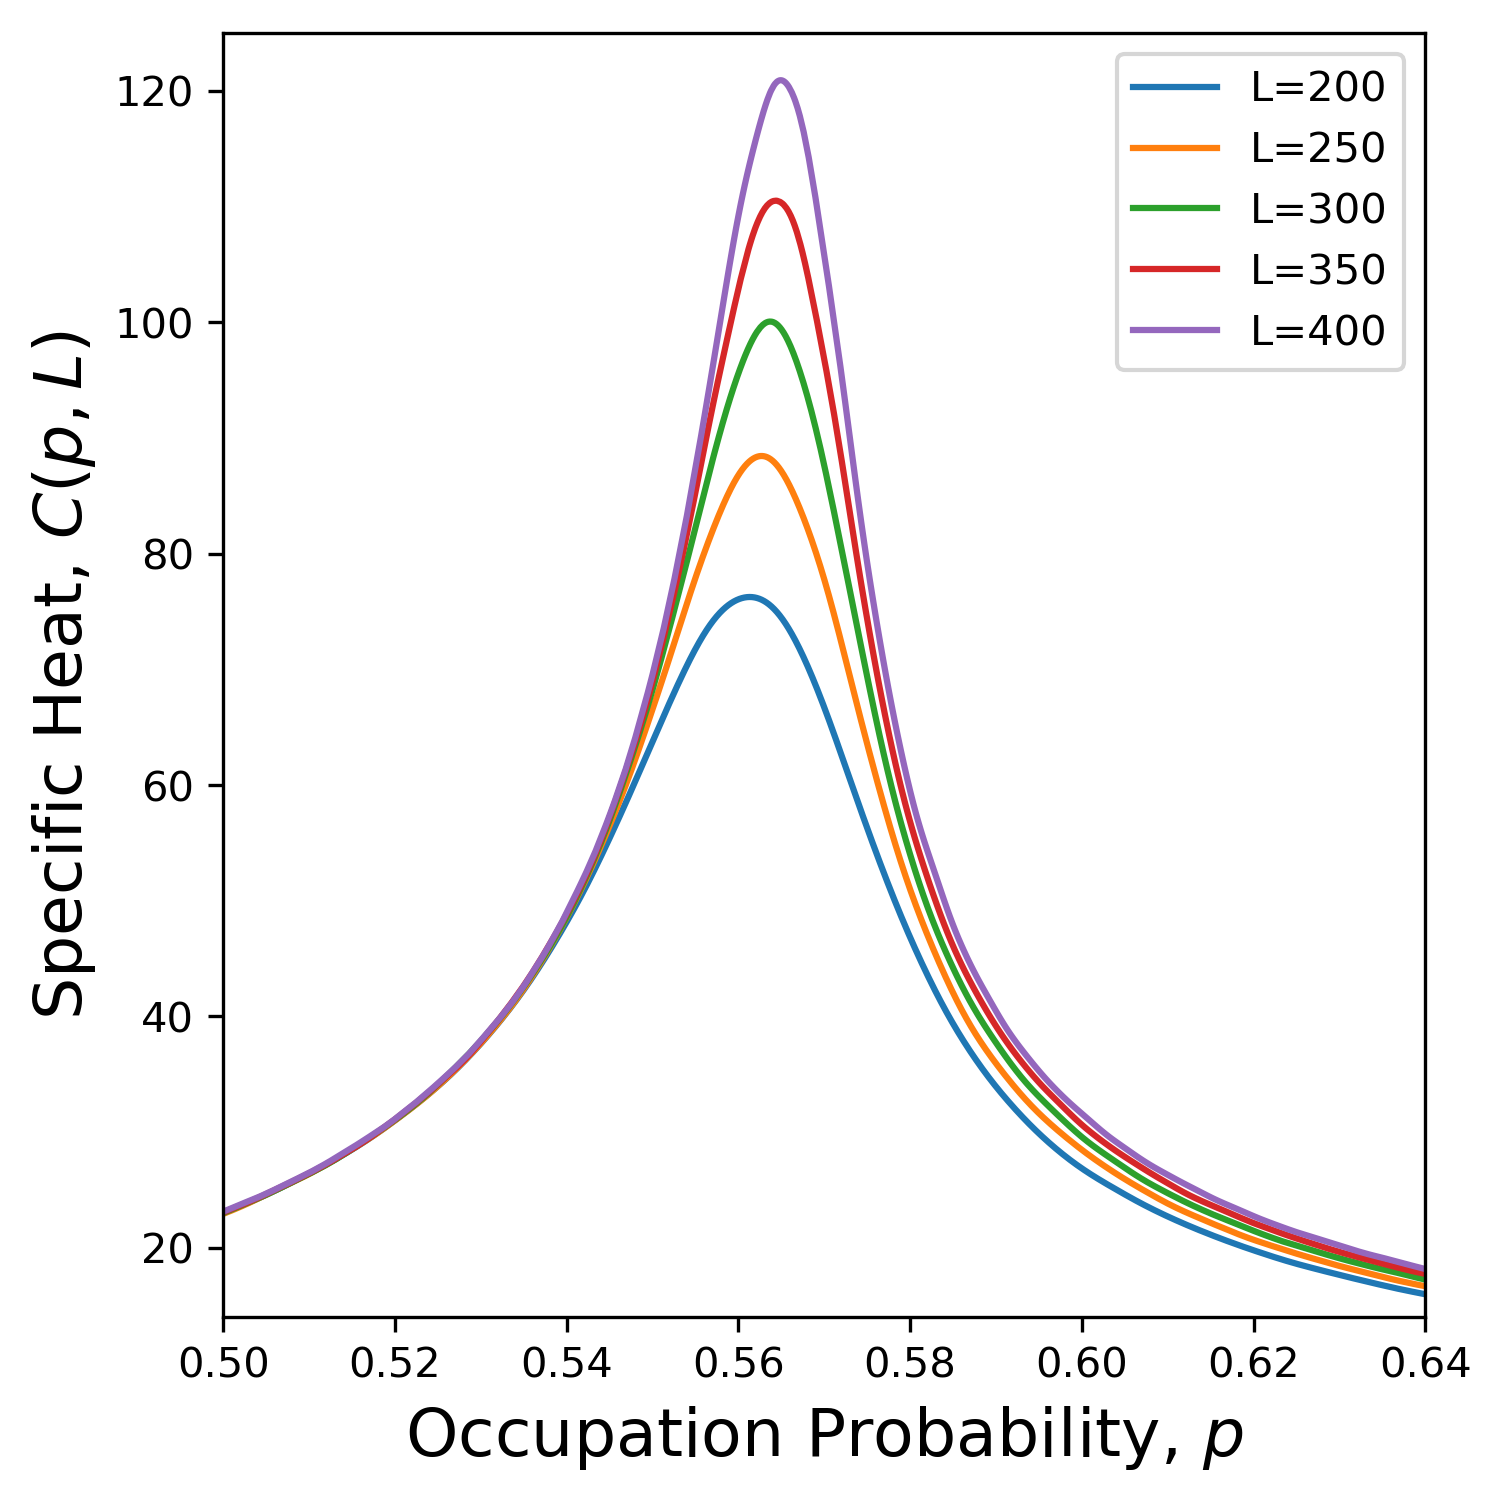

In [33]:
fig = plt.figure(figsize=(5, 5), dpi=300)
lengths = np.sort(list(data.keys()))
for L in lengths:
    p, C, C_conv, X, X_conv = data[L].T
    
    x = p
    y = C_conv
    plt.plot(x, y, label='L={}'.format(L))
    pass
    
plt.legend()

plt.xlabel(r'Occupation Probability, $p$', font)
plt.ylabel(r'Specific Heat, $C(p,L)$', font)
# plt.title('Specific Heat vs Occupation Probability', font)

plt.xlim(0.5, 0.64)
plt.ylim(14, 125)

fig.tight_layout(pad=0.7)

out_file_name = out_img_dir + signature
out_file_name += '_specific_heat-pc{:.4f}.eps'.format(pc)
print(out_file_name)
plt.savefig(out_file_name)

./graphs/sq_lattice_site_percolation_ballistic_deposition_L1_periodic__specific_heat-data_collapse-pc0.5782_alpha_0.6712_nu_0.736-with.eps


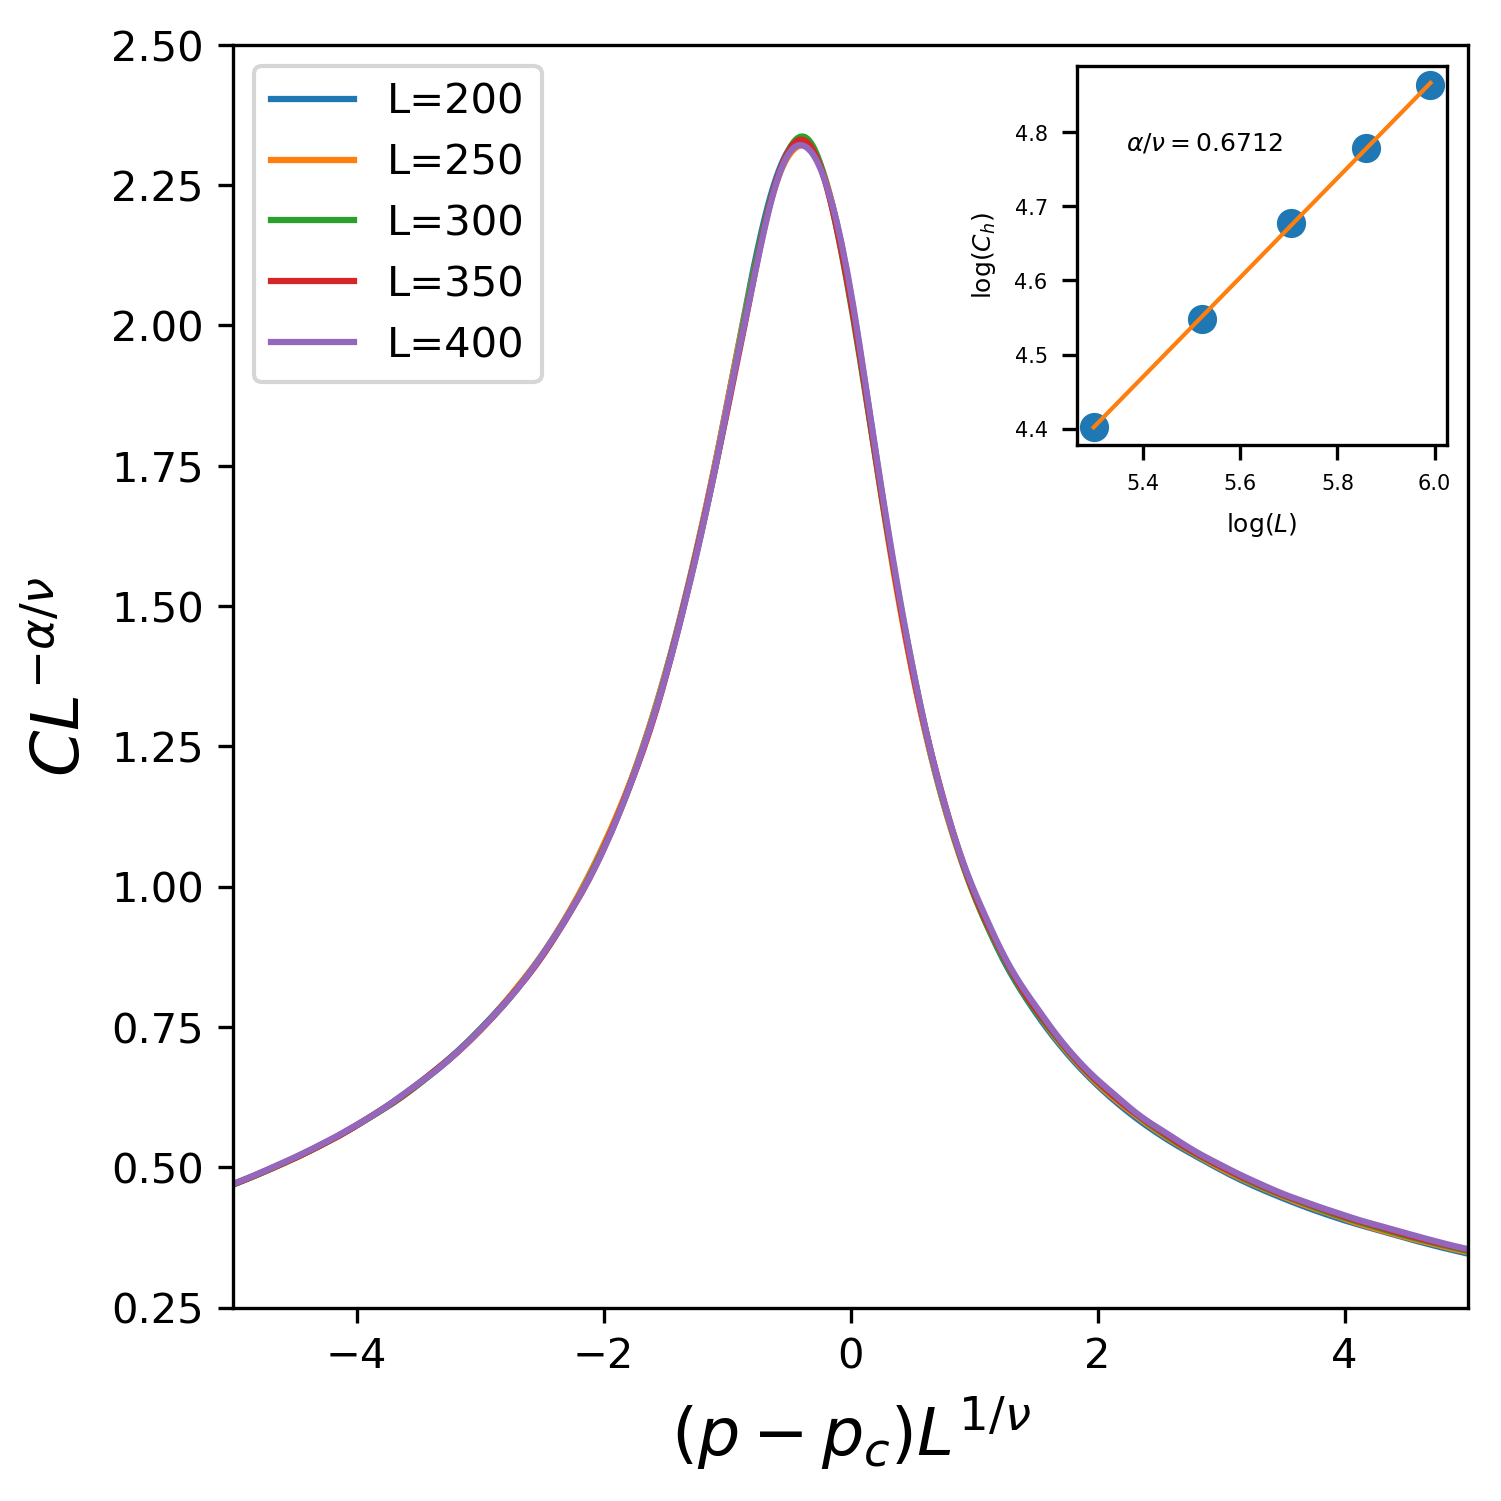

In [19]:
fig = plt.figure(figsize=(5, 5), dpi=300)
lengths = np.sort(list(data.keys()))
for L in lengths:
    p, C, C_conv, X, X_conv = data[L].T
    
    x = (p-pc)*L**(one_by_nu)
    y = C_conv*L**(-alpha_by_nu)
    plt.plot(x, y, label='L={}'.format(L))
#     plt.scatter(x, y, label='L={}'.format(L), s=1)
    pass
    
plt.legend(loc=2)

plt.xlabel(r'$(p-p_c) L^{1/\nu}$', font)
plt.ylabel(r'$C L^{-\alpha/\nu}$', font)
# plt.title('Specific Heat vs Occupation Probability', font)

plt.xlim(-5, 5)
plt.ylim(0.25, 2.5)
fig.tight_layout(pad=0.7)

## plotting exponent finding graph
ax = plt.gca()
i_axes = inset_axes(ax, 
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    #height=1, # height : 1 inch
                    loc=1)

plt.plot(ch_log[:,0], ch_log[:,1], 'o')

x = np.linspace(np.min(ch_log[:,0]), np.max(ch_log[:,0]), 10)
y = regress[0]*x + regress[1]
plt.plot(x, y, linewidth=1)

plt.xlabel(r'$\log(L)$', inside_font)
plt.ylabel(r'$\log(C_h)$', inside_font)

plt.tick_params(axis='both', which='major', labelsize=5)

fig.text(0.75, 0.9, r"$\alpha/\nu={:.4}$".format(alpha_by_nu), inside_font)


## saving to file
out_file_name = out_img_dir + signature
out_file_name += '_specific_heat-data_collapse-pc{:.4f}_alpha_{:.4f}_nu_{:.3f}-with.eps'.format(pc, alpha_by_nu, one_by_nu)
print(out_file_name)
# plt.savefig(out_file_name)

## Order parameter and it's derivative


In [62]:
order_parameter = load_order_parameter_data(files)

{'length': 400, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 100, 'ensemble_size': 15000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 500, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 300, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{'length': 200, 'ensemble_size': 10000, 'random_seed': 1192773324, 'signature': 'sq_lattice_site_percolation_periodic_', 'time': '2019-07-08_194309', 'cols': ['p', 'H', 'P_largest', 'P_wrapping']}
{400: 10000, 10

(0.5, 0.62)

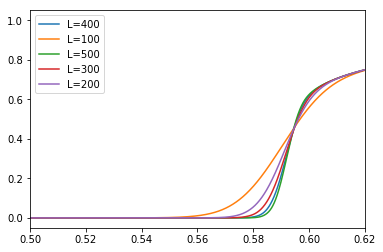

In [63]:
for L in order_parameter.keys():
    p = np.linspace(1/L**2, 1, L**2)
    plt.plot(p, order_parameter[L], label='L={}'.format(L))
    pass
plt.legend()
plt.xlim(0.5, 0.62)

(0.5, 0.62)

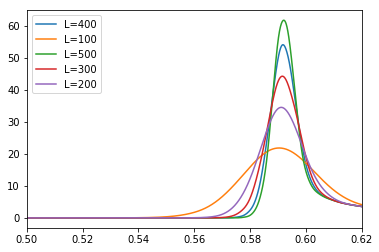

In [64]:
for L in order_parameter.keys():
    p = np.linspace(1/L**2, 1, L**2)
    P = order_parameter[L]
    p, X = get_susceptibility(L, P)
    plt.plot(p, X, label='L={}'.format(L))
    pass
plt.legend()
plt.xlim(0.5, 0.62)


In [65]:
X_h = []
for L in order_parameter.keys():
    p = np.linspace(1/L**2, 1, L**2)
    P = order_parameter[L]
    p, X = get_susceptibility(L, P)
    X_h.append([L, np.max(X)])
#     plt.plot(p, X, label='L={}'.format(L))
    pass
# plt.legend()
# plt.xlim(0.5, 0.62)


In [66]:
X_h_log = np.log(X_h)

In [67]:
stats.linregress(X_h_log[:,0], X_h_log[:,1])

LinregressResult(slope=0.6468076340146306, intercept=0.10879321860512814, rvalue=0.9998646697674138, pvalue=1.889806261346554e-06, stderr=0.006144280090185378)

### for L1

In [32]:
gamma_by_nu = 0.6381816032621852
alpha_by_nu = 0.6467038359751919
one_by_nu = 0.736
beta_by_nu = 0.1026

In [35]:
(alpha_by_nu + 2*beta_by_nu + gamma_by_nu) / one_by_nu

2.0245726076594797

### for L2

In [49]:
alpha_by_nu = 0.6455275801529577
gamma_by_nu = 0.6332794281930978
one_by_nu = 0.721
beta_by_nu = 0.0982

In [50]:
(alpha_by_nu + 2*beta_by_nu + gamma_by_nu) / one_by_nu

2.046056877040299